In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
import numpy as np
import time
np.random.seed(42)

In [14]:
# create needed functions e.g. subgradients
def my_function(x, Z , B):
    sum=0
    for i in range(len(B)):
        sum = sum + ( np.dot(Z[i], x) - B[i] )
    sum = sum / ( len(B) )
    return sum 
def my_function_sub_gradient(x, Z , B):
    sg=0
    for i in range(len(B)):
        if (np.dot(Z[i], x) - B[i]) > 0 :
                sg = sg + Z[i]
        elif (np.dot(Z[i], x) - B[i]) < 0 :
                sg = sg - Z[i]
        

    sg = sg / ( len(B) )
    return sg
def distant_to_set(X_new, X_t, V) :
    #return np.dot((X_new - (X_t - V)) , (X_new - (X_t - V)))
    return np.linalg.norm((X_new - (X_t - V)))

In [15]:
#generate needed vectors and optimized value
num_vectors = 100
vector_size = 10
mean = np.zeros(vector_size)
covariance_matrix = np.identity(vector_size)
random_vectors = np.random.multivariate_normal(mean, covariance_matrix, size=num_vectors)
random_numbers = np.random.randn(100)
x0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
f = lambda x: my_function(x, random_vectors , random_numbers)
f_star = minimize(f, x0).fun
print(f_star)


-26666539783.653667


In [16]:
#algorithm 2 
T = 4000
eta = [0.01, 0.1, 1, 10]
f_result_part1 = [[],[],[],[]]
f_result_part2 = [[],[],[],[]]

i=0
for e in eta :
    x = x0
    for t in range(T):
        v = my_function_sub_gradient(x, random_vectors, random_numbers)
        v_random = np.random.multivariate_normal(v, np.identity(vector_size), size=1)

        x = x - e * v
        f_result_part1[i].append ( my_function(x, random_vectors , random_numbers) - f_star)
        f_result_part2[i].append ( min(f_result_part1[i]) - f_star)
    i = i + 1


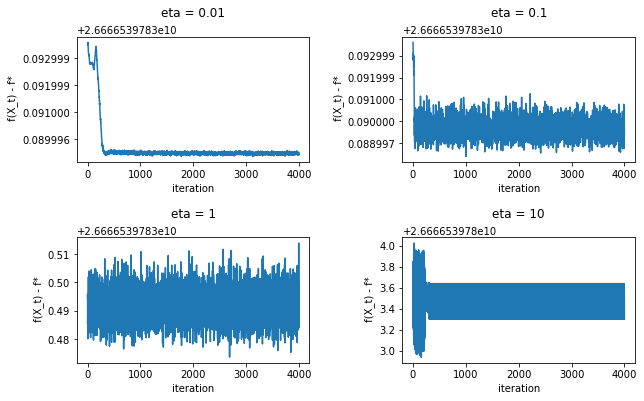

In [10]:
#part 1 plots
plt.figure(figsize=(10, 6))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.subplot(2,2,1)
plt.plot(f_result_part1[0])
plt.title("eta = 0.01",pad=20)
plt.ylabel(" f(X_t) - f*")
plt.xlabel("iteration")

plt.subplot(2,2,2)
plt.plot(f_result_part1[1])
plt.title("eta = 0.1",pad=20)
plt.ylabel(" f(X_t) - f*")
plt.xlabel("iteration")

plt.subplot(2,2,3)
plt.plot(f_result_part1[2])
plt.title("eta = 1",pad=20)
plt.ylabel(" f(X_t) - f*")
plt.xlabel("iteration")

plt.subplot(2,2,4)
plt.plot(f_result_part1[3])
plt.title("eta = 10",pad=20)
plt.ylabel(" f(X_t) - f*")
plt.xlabel("iteration")


plt.show()

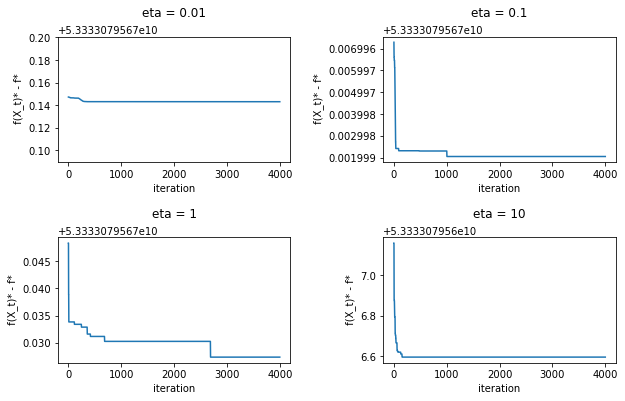

In [11]:
#part 2 plots
plt.figure(figsize=(10, 6))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.subplot(2,2,1)
plt.plot(f_result_part2[0])
plt.title("eta = 0.01",pad=20)
plt.ylabel(" f(X_t)* - f*")
plt.xlabel("iteration")

plt.subplot(2,2,2)
plt.plot(f_result_part2[1])
plt.title("eta = 0.1",pad=20)
plt.ylabel(" f(X_t)* - f*")
plt.xlabel("iteration")

plt.subplot(2,2,3)
plt.plot(f_result_part2[2])
plt.title("eta = 1",pad=20)
plt.ylabel(" f(X_t)* - f*")
plt.xlabel("iteration")

plt.subplot(2,2,4)
plt.plot(f_result_part2[3])
plt.title("eta = 10",pad=20)
plt.ylabel(" f(X_t)* - f*")
plt.xlabel("iteration")


plt.show()

In [17]:
#part 3
f_result_part3 = [[],[],[],[]]
i=0
for e in eta :
    x = x0
    for t in range(T):
        sg = my_function_sub_gradient(x, random_vectors, random_numbers)
        v_random = np.random.multivariate_normal(sg, np.identity(vector_size), size=1)
        f = lambda x_n : distant_to_set(x_n, x, v_random)
        x = minimize(f, x0).x
        #x = x - e * v
        f_result_part3[i].append ( my_function(x, random_vectors , random_numbers) - f_star)
    i = i + 1


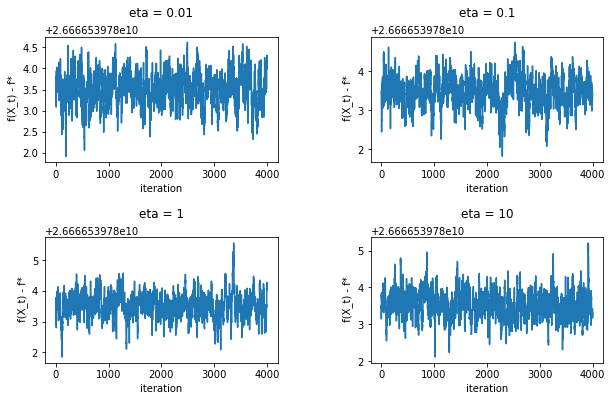

In [12]:
#part 3 plots
plt.figure(figsize=(10, 6))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.subplot(2,2,1)
plt.plot(f_result_part3[0])
plt.title("eta = 0.01",pad=20)
plt.ylabel(" f(X_t) - f*")
plt.xlabel("iteration")

plt.subplot(2,2,2)
plt.plot(f_result_part3[1])
plt.title("eta = 0.1",pad=20)
plt.ylabel(" f(X_t) - f*")
plt.xlabel("iteration")

plt.subplot(2,2,3)
plt.plot(f_result_part3[2])
plt.title("eta = 1",pad=20)
plt.ylabel(" f(X_t) - f*")
plt.xlabel("iteration")

plt.subplot(2,2,4)
plt.plot(f_result_part3[3])
plt.title("eta = 10",pad=20)
plt.ylabel(" f(X_t) - f*")
plt.xlabel("iteration")


plt.show()

In [19]:
# part 4
#calculate time spent in each iteration
#algorithm 2

start_time = time.time()
v = my_function_sub_gradient(x, random_vectors, random_numbers)
v_random = np.random.multivariate_normal(v, np.identity(vector_size), size=1)
x = x - e * v
f_result_part1[0].append ( my_function(x, random_vectors , random_numbers) - f_star)
end_time = time.time()
elapsed_time_algorithm2 = end_time - start_time

start_time = time.time()
sg = my_function_sub_gradient(x, random_vectors, random_numbers)
v_random = np.random.multivariate_normal(sg, np.identity(vector_size), size=1)
f = lambda x_n : distant_to_set(x_n, x, v_random)
x = minimize(f, x0).x
f_result_part3[0].append ( my_function(x, random_vectors , random_numbers) - f_star)
end_time = time.time()
elapsed_time_algorithm4 = end_time - start_time
print("Elapsed time:", elapsed_time_algorithm2, "seconds")
print("Elapsed time:", elapsed_time_algorithm4, "seconds")

Elapsed time: 0.0020360946655273438 seconds
Elapsed time: 0.029249191284179688 seconds


In [23]:
alg2=[]
alg2_T=0.002
alg4=[]
alg4_T=0.03
for i in range(T+1):
    alg2.append(i*alg2_T)
    alg4.append(i*alg4_T)

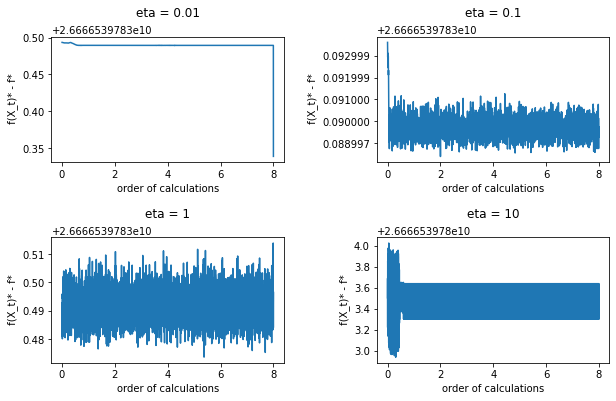

In [26]:
#part 4 plots of algorithm 2
plt.figure(figsize=(10, 6))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.subplot(2,2,1)
plt.plot(alg2,f_result_part1[0])
plt.title("eta = 0.01",pad=20)
plt.ylabel(" f(X_t)* - f*")
plt.xlabel("order of calculations")

plt.subplot(2,2,2)
plt.plot(alg2[:4000],f_result_part1[1])
plt.title("eta = 0.1",pad=20)
plt.ylabel(" f(X_t)* - f*")
plt.xlabel("order of calculations")

plt.subplot(2,2,3)
plt.plot(alg2[:4000],f_result_part1[2])
plt.title("eta = 1",pad=20)
plt.ylabel(" f(X_t)* - f*")
plt.xlabel("order of calculations")

plt.subplot(2,2,4)
plt.plot(alg2[:4000],f_result_part1[3])
plt.title("eta = 10",pad=20)
plt.ylabel(" f(X_t)* - f*")
plt.xlabel("order of calculations")


plt.show()

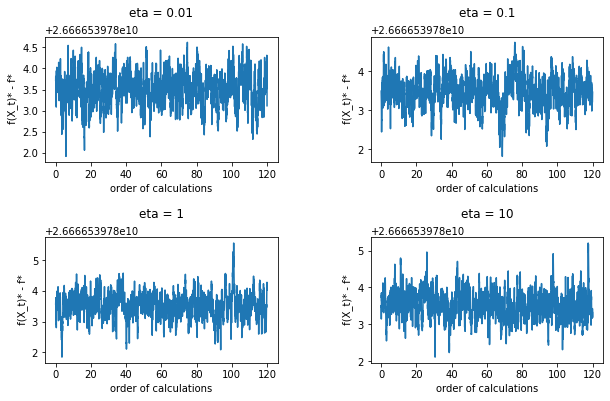

In [27]:
#part 4 plots of algorithm 4
plt.figure(figsize=(10, 6))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.subplot(2,2,1)
plt.plot(alg4,f_result_part3[0])
plt.title("eta = 0.01 SGD",pad=20)
plt.ylabel(" f(X_t)* - f*")
plt.xlabel("order of calculations")

plt.subplot(2,2,2)
plt.plot(alg4[:4000],f_result_part3[1])
plt.title("eta = 0.1 SGD",pad=20)
plt.ylabel(" f(X_t)* - f*")
plt.xlabel("order of calculations")

plt.subplot(2,2,3)
plt.plot(alg4[:4000],f_result_part3[2])
plt.title("eta = 1 SGD",pad=20)
plt.ylabel(" f(X_t)* - f*")
plt.xlabel("order of calculations")

plt.subplot(2,2,4)
plt.plot(alg4[:4000],f_result_part3[3])
plt.title("eta = 10 SGD",pad=20)
plt.ylabel(" f(X_t)* - f*")
plt.xlabel("order of calculations")


plt.show()